# Annotate Peaks

Annotate peak features such as GC content, gene features, distances from nearest genes, etc.

In [1]:
library(annotatr)
library(reshape2)
library(ggplot2)
library(RColorBrewer)
library(patchwork)


Attaching package: ‘patchwork’


The following object is masked from ‘package:annotatr’:

    plot_annotation




In [2]:
BED_DIR = "./beds/20200330_gridmap_peakwidthnorm_n20/"

In [4]:
bed_names = sub(".bed", "", list.files(sprintf("%s/", BED_DIR), pattern="idx[0-9]*.bed"))
bed_names

[1] "idx1"  "idx10" "idx11" "idx12" "idx13" "idx14" "idx15" "idx16" "idx17"
[10] "idx18" "idx19" "idx2"  "idx20" "idx3"  "idx4"  "idx5"  "idx6"  "idx7" 
[19] "idx8"  "idx9"

In [17]:
bed_names = bed_names[order(nchar(bed_names), bed_names)]
bed_names

[1] "idx1"  "idx2"  "idx3"  "idx4"  "idx5"  "idx6"  "idx7"  "idx8"  "idx9" 
[10] "idx10" "idx11" "idx12" "idx13" "idx14" "idx15" "idx16" "idx17" "idx18"
[19] "idx19" "idx20"

In [5]:
qual_col_pals = brewer.pal.info[brewer.pal.info$category == 'qual',]
col_vector = unlist(mapply(brewer.pal, qual_col_pals$maxcolors, rownames(qual_col_pals)))

In [6]:
get_annotated_df <- function(annotations, bed_names, bed_dir) {
    annotated = list()

    for (i in bed_names) {
        peaks = read.table(sprintf("%s/%s.bed", bed_dir, i))
        colnames(peaks) = c("chr", "start", "end")
        peaks = makeGRangesFromDataFrame(peaks)

        dm_annotated = annotate_regions(
        regions = peaks,
        annotations = annotations,
        ignore.strand = TRUE,
        quiet = TRUE)

        dm_annsum = summarize_annotations(
        annotated_regions = dm_annotated,
        quiet = TRUE)

        annotated[[i]] = dm_annsum
        }
    
    # specific to type of annotation, this one for gene level annotation
    annotated_df = data.frame(annotated[[1]])
    annotated_df = annotated_df[order(annotated_df$annot.type), ] # sort by rowname for ease
    rownames(annotated_df) = annotated_df$annot.type
    annotated_df$annot.type = NULL
    colnames(annotated_df) = bed_names[1]

    for (i in bed_names[2:length(bed_names)]) {
        cur_df = annotated[[i]]
        rownames(cur_df) = cur_df$annot.type
        annotated_df[, sprintf("%s", i)] = cur_df[rownames(annotated_df), "n"]
    }
    
    # replace NA with 0
    annotated_df[is.na(annotated_df)] = 0
    
    # get percentage
    annotated_df = 100*t(t(annotated_df)/colSums(annotated_df))

    annotated_df
}

## Genes

In [44]:
annotations = build_annotations(genome = 'hg38', annotations = c('hg38_basicgenes', 
                                                                 'hg38_genes_intergenic',
                                                                 'hg38_genes_intronexonboundaries'))

'select()' returned 1:1 mapping between keys and columns

Building promoters...

Building 1to5kb upstream of TSS...

Building intergenic...

Building 5UTRs...

Building 3UTRs...

Building exons...

Building introns...

Building intron exon boundaries...

Warning message in valid.GenomicRanges.seqinfo(x, suggest.trim = TRUE):
"GRanges object contains 131 out-of-bound ranges located on sequences
  chr1_GL383518v1_alt, chr2_GL383522v1_alt, chr5_GL339449v2_alt,
  chr5_KI270795v1_alt, chr5_KI270898v1_alt, chr6_KI270797v1_alt,
  chr6_KI270798v1_alt, chr6_KI270801v1_alt, chr7_GL383534v2_alt,
  chr7_KI270803v1_alt, chr7_KI270806v1_alt, chr7_KI270809v1_alt,
  chr8_KI270821v1_alt, chr9_GL383540v1_alt, chr9_GL383541v1_alt,
  chr11_KI270902v1_alt, chr12_GL383551v1_alt, chr12_GL383553v2_alt,
  chr12_KI270834v1_alt, chr14_KI270847v1_alt, chr15_KI270850v1_alt,
  chr16_KI270854v1_alt, chr17_JH159146v1_alt, chr17_JH159147v1_alt,
  chr17_KI270857v1_alt, chr17_KI270860v1_alt, chr19_GL383575v2_alt,
  chr1

In [45]:
genic_annotated_df = get_annotated_df(annotations, bed_names, BED_DIR)

Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a

In [46]:
genic_annotated_df

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15,idx16,idx17,idx18,idx19,idx20
hg38_genes_1to5kb,5.3576995,11.933079,14.644447,14.960895,8.0281000,7.2526750,13.287734,12.657436,10.567228,13.563140,9.4615927,8.073379,8.202816,7.172850,8.470905,11.046686,10.407892,8.0037111,10.3515340,9.8082215
hg38_genes_3UTRs,0.7793017,2.122574,1.659900,2.527785,2.5388008,1.7127415,2.988651,1.002680,2.348019,2.065712,2.0421187,1.306112,1.764188,1.763014,2.061111,2.351295,1.954482,2.2730787,2.2025575,2.0876333
hg38_genes_5UTRs,1.1182980,1.280373,11.318098,6.243685,0.4149649,0.4345762,4.053848,15.899955,2.242850,1.916946,0.5944984,1.470961,0.633524,0.408398,1.358758,1.641508,0.857164,0.3309108,0.6369427,0.8234434
hg38_genes_exons,5.5057668,7.562738,16.618649,13.765296,5.6820781,5.3317752,12.891280,18.747209,9.709870,8.764398,6.0289524,6.205089,5.767708,4.975554,8.155831,8.369489,6.635631,5.5203340,6.4958429,7.0003440
hg38_genes_intergenic,42.4134975,23.832015,3.622643,9.310332,24.5482764,30.6942263,14.185201,1.319786,21.141316,16.823224,25.4794613,33.181165,25.934888,28.550475,26.036299,19.470159,23.546146,26.3336941,22.7792094,23.0370657
hg38_genes_intronexonboundaries,3.9588529,6.327889,12.323206,10.651873,5.2442411,4.7292116,9.994119,13.633318,8.070601,6.749692,5.6494139,4.784851,5.054993,4.584412,6.429486,6.857943,5.490283,5.0688109,5.9269704,6.5595975
hg38_genes_introns,36.7129052,41.871052,22.837546,29.459642,50.8021565,47.0109192,32.456924,17.221974,39.385903,43.481957,47.2676586,40.514836,49.368676,49.887834,42.814008,44.514646,46.737604,49.7881552,48.1548111,46.3987788
hg38_genes_promoters,4.1536783,5.070278,16.975511,13.080492,2.7413821,2.8338750,10.142244,19.517642,6.534214,6.634930,3.4763040,4.463606,3.273207,2.657463,4.673603,5.748276,4.370797,2.6813051,3.4521321,4.2849157


In [47]:
# rename rows
rownames(genic_annotated_df) = lapply(strsplit(rownames(genic_annotated_df), "_"), "[[", 3)

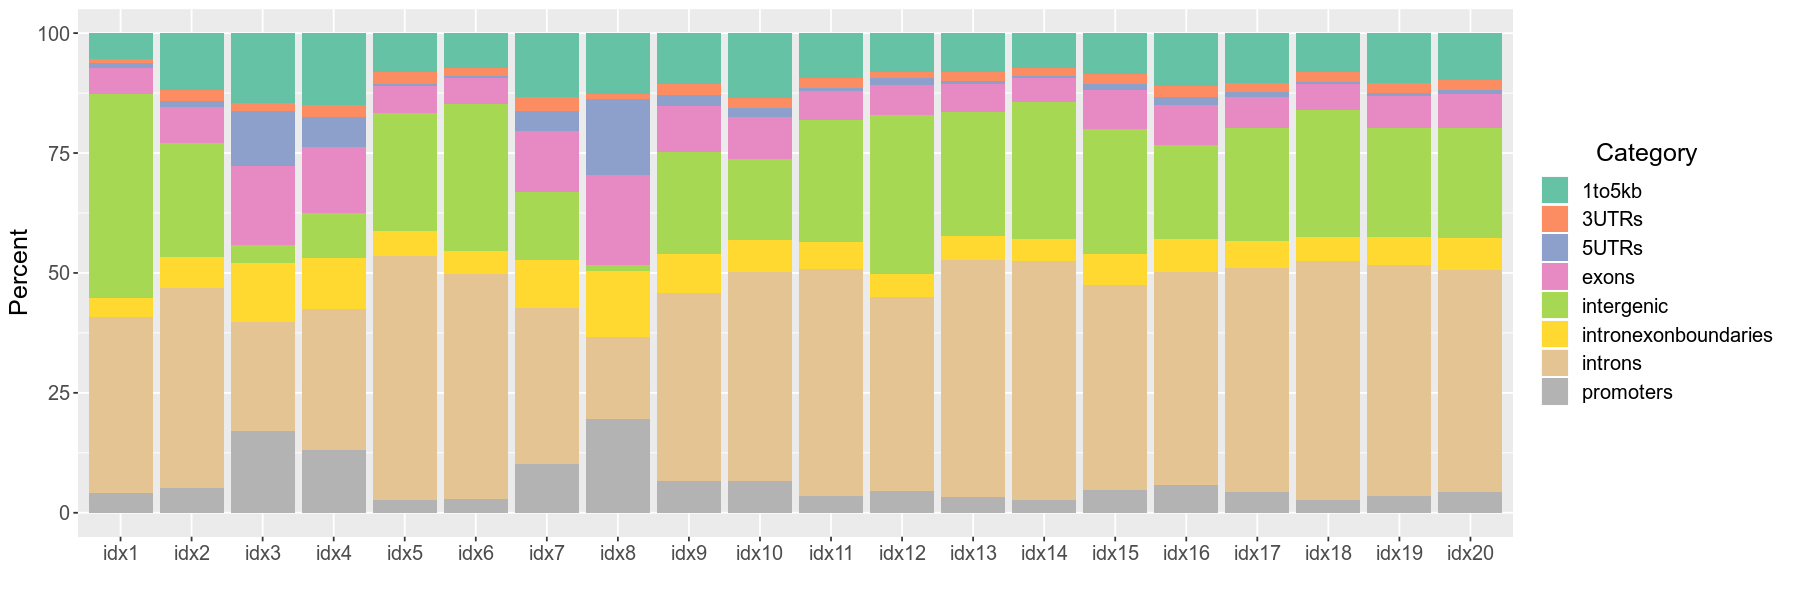

In [49]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(genic_annotated_df), aes(x=factor(Var2, levels=colnames(genic_annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_brewer(palette="Set2") +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## CpG

In [18]:
annotations = build_annotations(genome = 'hg38', annotations = c('hg38_cpgs'))

Building CpG islands...

Building CpG shores...

Building CpG shelves...

Building inter-CpG-islands...



In [19]:
cpg_annotated_df = get_annotated_df(annotations, bed_names, BED_DIR)

Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a tibble is deprecated.”
Warning message:
“Setting row names on a

In [20]:
cpg_annotated_df

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15,idx16,idx17,idx18,idx19,idx20
hg38_cpg_inter,90.2346603,87.677165,18.950007,44.011595,97.7553921,97.81576448,59.50144,6.800689,79.202147,82.6972010,93.9314331,90.536895,96.97249245,98.58766061,87.870467,87.192741,93.47986792,97.76437884,93.08558850,92.5069353
hg38_cpg_islands,4.3827611,1.070866,34.733078,18.134898,0.3009530,0.06331117,13.35528,48.799540,6.673072,0.8969466,0.5385525,2.946310,0.04193224,0.09203214,4.463040,1.507581,0.07885269,0.01957637,0.07121585,0.5519054
hg38_cpg_shelves,0.7715486,5.236220,3.845303,6.055571,1.0282561,1.25265681,5.59213,1.424469,3.303403,7.7290076,2.7190332,1.951865,1.75276753,0.70793954,1.477510,4.359063,3.83914051,1.35468462,3.94924252,3.0865820
hg38_cpg_shores,4.6110299,6.015748,42.471612,31.797936,0.9153988,0.86826753,21.55115,42.975302,10.821378,8.6768448,2.8109812,4.564930,1.23280778,0.61236770,6.188982,6.940616,2.60213888,0.86136017,2.89395313,3.8545773


In [21]:
# rename rows
rownames(cpg_annotated_df) = lapply(strsplit(rownames(cpg_annotated_df), "_"), "[[", 3)

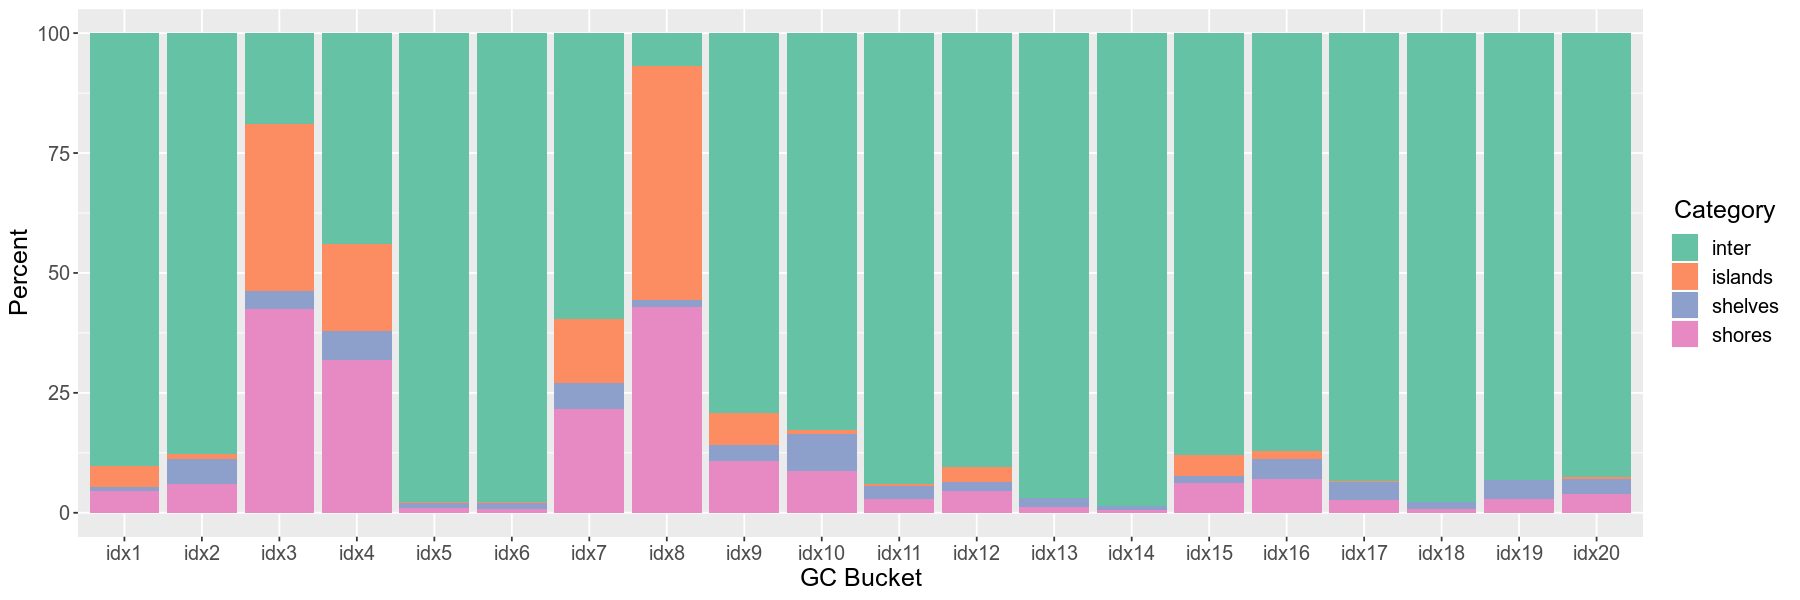

In [22]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(cpg_annotated_df), aes(x=factor(Var2, levels=colnames(cpg_annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_brewer(palette="Set2") +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("GC Bucket") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## Distance From Nearest Gene

In [23]:
library(EnsDb.Hsapiens.v86)

Loading required package: ensembldb

Loading required package: AnnotationFilter


Attaching package: 'ensembldb'


The following object is masked from 'package:stats':

    filter




In [24]:
edb <- EnsDb.Hsapiens.v86

In [25]:
genes.hg38 = genes(edb, column = "gene_name", filter = GeneBiotypeFilter("protein_coding"))

In [26]:
tss.hg38 = resize(genes.hg38, width=1, fix='start')
head(tss.hg38, 2)

GRanges object with 2 ranges and 3 metadata columns:
                  seqnames    ranges strand |   gene_name         gene_id
                     <Rle> <IRanges>  <Rle> | <character>     <character>
  ENSG00000186092        1     69091      + |       OR4F5 ENSG00000186092
  ENSG00000279928        1    182393      + |  FO538757.2 ENSG00000279928
                    gene_biotype
                     <character>
  ENSG00000186092 protein_coding
  ENSG00000279928 protein_coding
  -------
  seqinfo: 287 sequences from GRCh38 genome

In [32]:
plots = list()

for (i in bed_names) {
    # take mid of peaks
    peaks = read.table(sprintf("%s/%s.bed", BED_DIR, i))
    colnames(peaks) = c("chr", "start", "end")
    peaks$chr = sub("chr", "", peaks$chr)
    peaks_mid = as.integer((peaks$start+peaks$end)/2)
    peaks$start = peaks_mid
    peaks$end = peaks_mid+1
    peaks = makeGRangesFromDataFrame(peaks)
    
    dists = data.frame(distanceToNearest(peaks, tss.hg38, ignore.strand=TRUE))$distance
    print(sprintf("%s : %s" , i, median(dists)))
    plots[[i]] <- ggplot(data.frame(d=dists+1), aes(x=d)) + 
        geom_histogram(bins=50, col='black', alpha=0.5, fill='red') +
        scale_x_log10() +
        coord_cartesian(xlim=c(1,1e7)) +
        ggtitle(sprintf("%s", i)) +  
        xlab("Distance from Nearest TSS") + ylab("Count") + 
        geom_vline(xintercept = 1000, linetype="dashed") +
        theme(plot.title = element_text(hjust = 0.5))
}

[1] "idx1 : 127738.5"
[1] "idx2 : 46200"
[1] "idx3 : 1725.5"
[1] "idx4 : 12568"
[1] "idx5 : 74842"
[1] "idx6 : 81062.5"
[1] "idx7 : 22359"
[1] "idx8 : 387"
[1] "idx9 : 39134"
[1] "idx10 : 42150"
[1] "idx11 : 56019"
[1] "idx12 : 72008.5"
[1] "idx13 : 70465"
[1] "idx14 : 86378.5"
[1] "idx15 : 51730.5"
[1] "idx16 : 42596"
[1] "idx17 : 60041"
[1] "idx18 : 82371.5"
[1] "idx19 : 60702"
[1] "idx20 : 51014"


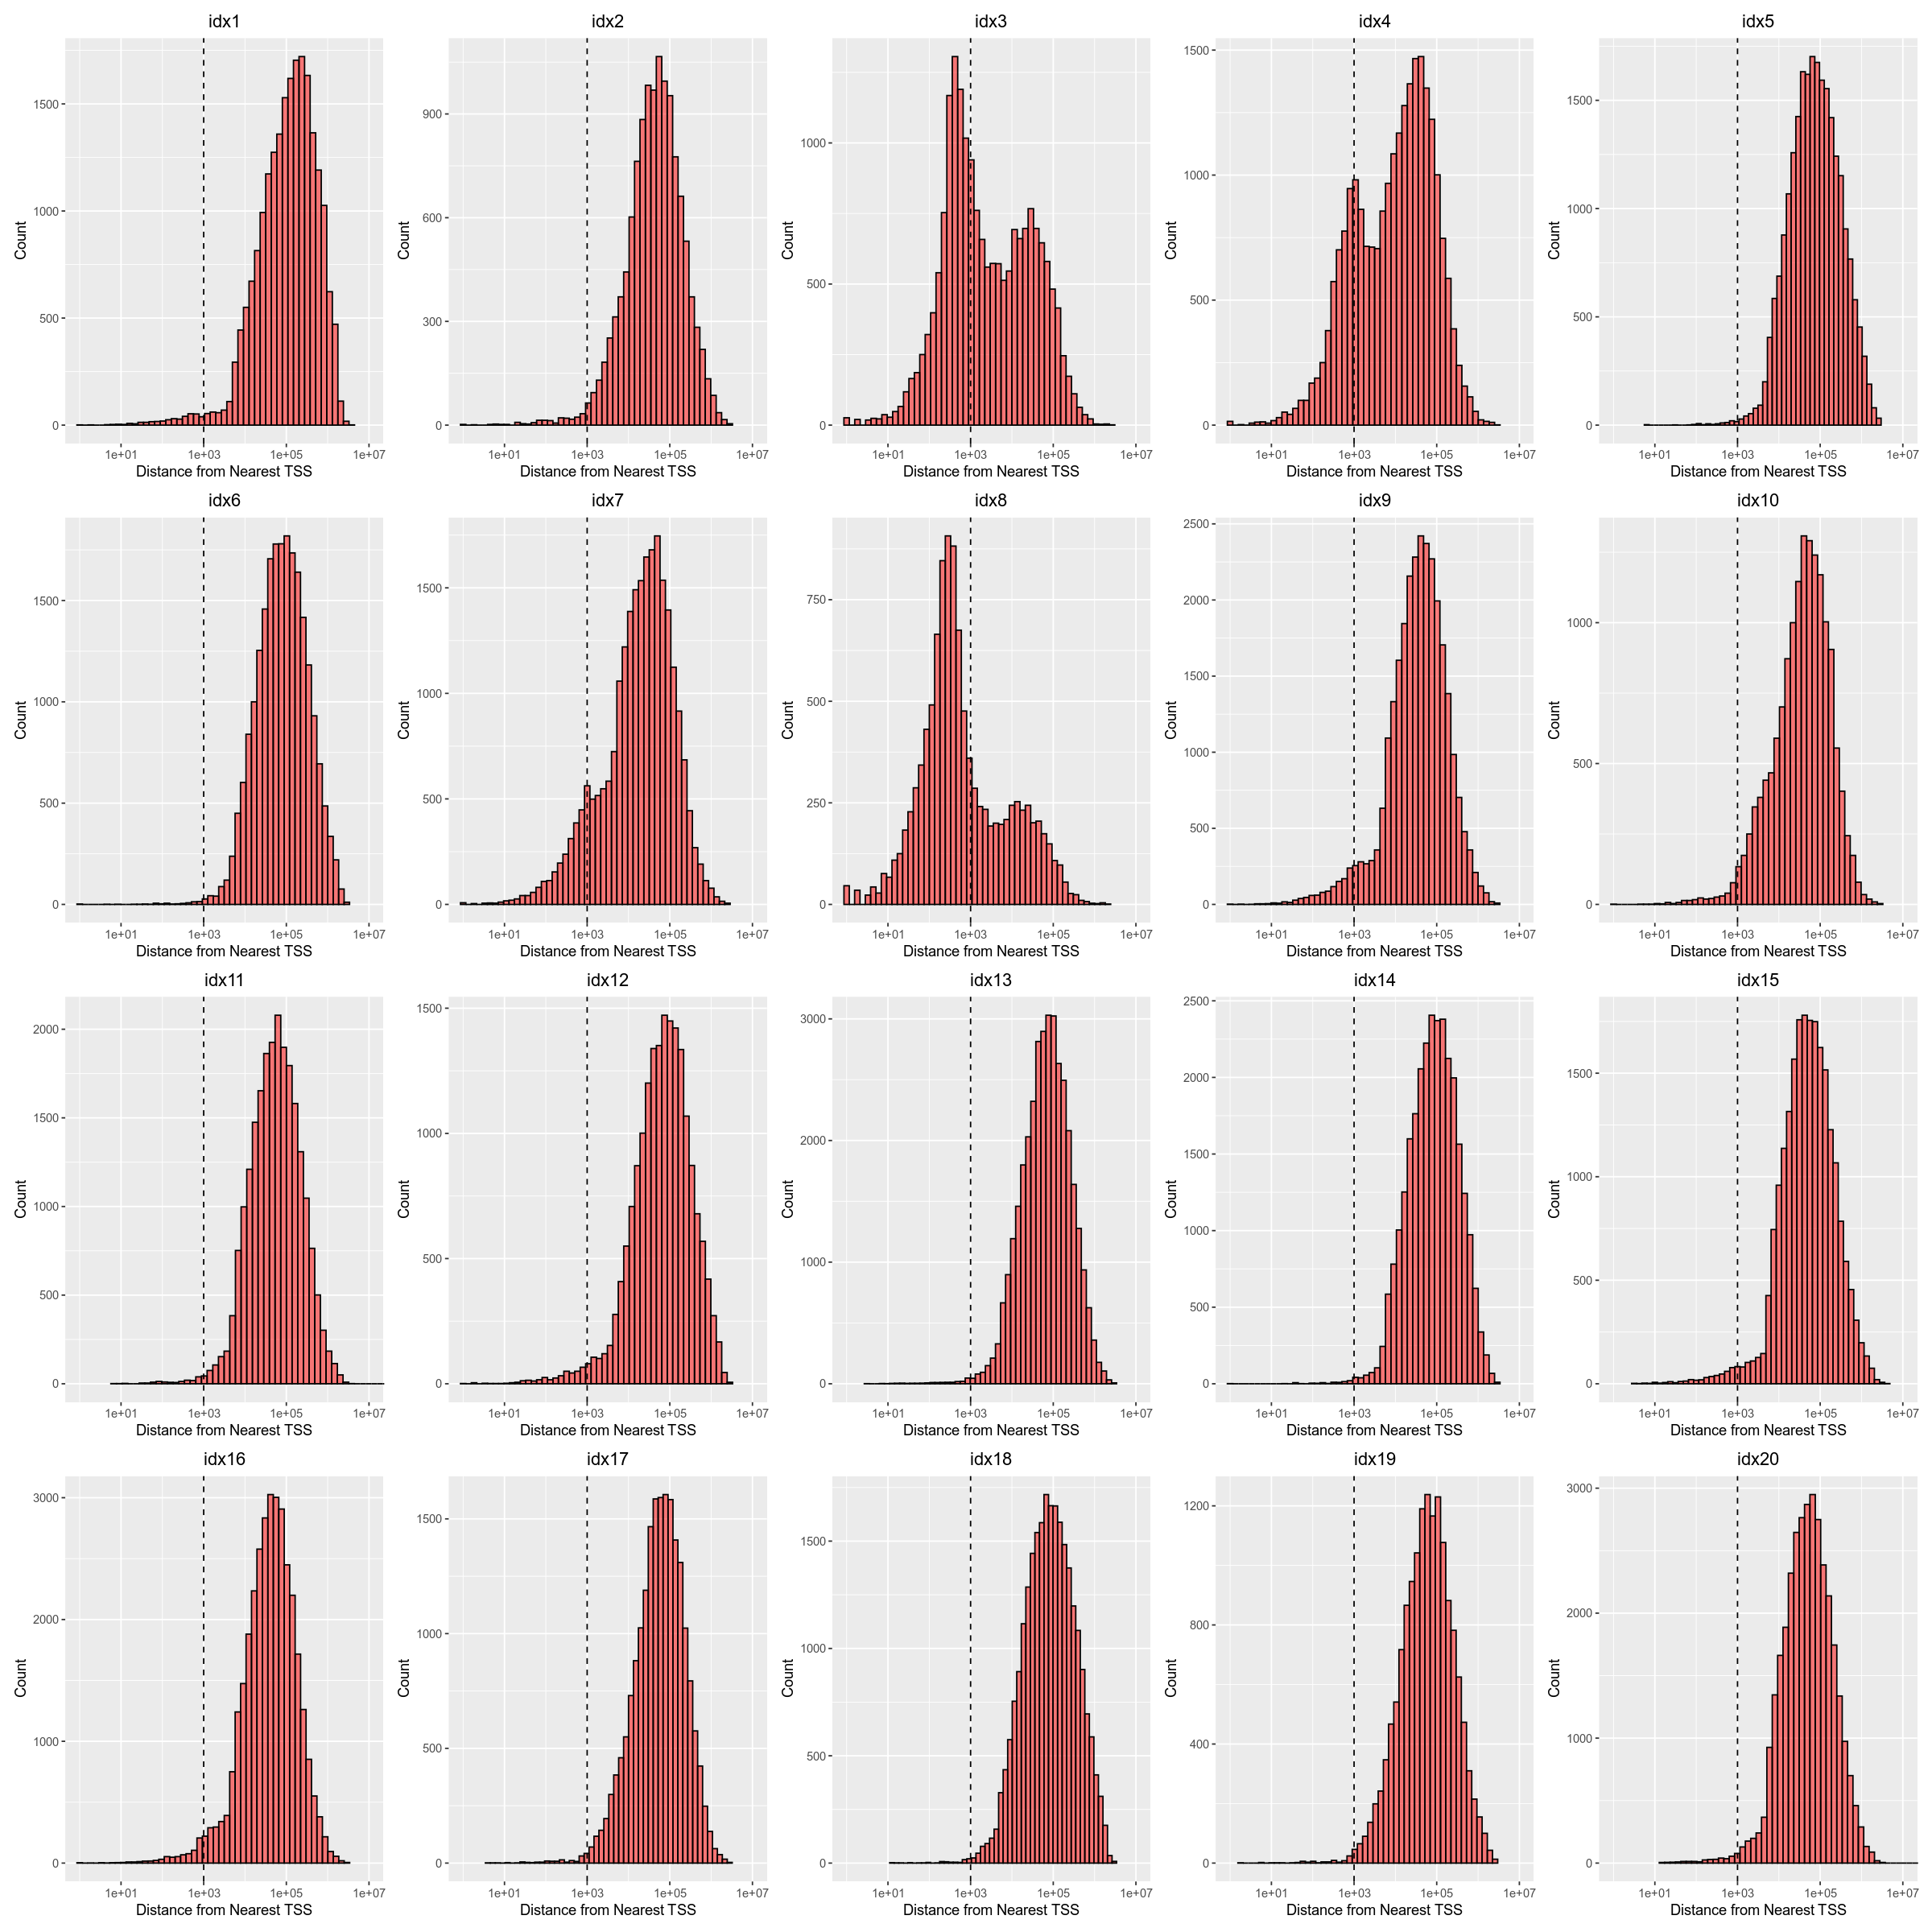

In [29]:
options(repr.plot.width = 20, repr.plot.height = 20)
wrap_plots(plots, ncol = 5)

## ChromHMM - Fibroblast

In [33]:
gzf = gzfile("/users/surag/kundajelab/scATAC-reprog/resources/ChromHMM/E055_15_coreMarks_hg38lift_mnemonics.bed.gz")
gr = read.table(gzf)
colnames(gr) = c("chr", "start", "end", "type")
annotations = makeGRangesFromDataFrame(gr)
annotations$type = gr$type
annotations

GRanges object with 671383 ranges and 1 metadata column:
           seqnames            ranges strand |        type
              <Rle>         <IRanges>  <Rle> |    <factor>
       [1]     chr1       10000-10800      * |       9_Het
       [2]     chr1       10800-12600      * |    15_Quies
       [3]     chr1       12600-18400      * |      5_TxWk
       [4]     chr1       18400-88600      * |    15_Quies
       [5]     chr1       88600-90600      * | 14_ReprPCWk
       ...      ...               ...    ... .         ...
  [671379]     chrY 56887453-57217249      * |    15_Quies
  [671380]     chrM           0-12799      * |    15_Quies
  [671381]     chrM       12799-12999      * |       9_Het
  [671382]     chrM       12999-13199      * |  8_ZNF/Rpts
  [671383]     chrM       13199-16398      * |      5_TxWk
  -------
  seqinfo: 25 sequences from an unspecified genome; no seqlengths

In [34]:
fib_annotated_df = get_annotated_df(annotations, bed_names, BED_DIR)

Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a

In [35]:
fib_annotated_df

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15,idx16,idx17,idx18,idx19,idx20
1_TssA,0.20212001,0.4576024,34.20529143,14.5619434,0.19081645,0.05134788,3.8012730,56.80005065,1.2324249,5.51529412,0.30115512,0.39156627,1.25786164,0.54246696,0.4258804,2.7529203,2.55225777,0.183191267,0.44891465,0.6708328
10_TssBiv,0.17517068,0.3050683,5.67933161,4.3192897,0.02841947,0.01711596,3.9515559,4.50804103,1.8746745,0.16000000,0.06188119,0.57228916,0.06011839,0.02523102,0.5405405,0.6102420,0.03079647,0.007477195,0.01704739,0.1989542
11_BivFlnk,0.07186489,0.5338695,6.68390690,9.3030856,0.07713857,0.00855798,9.5856907,2.76054198,3.1996760,1.07294118,0.05363036,0.56726908,0.18729190,0.03153878,0.5814906,1.8079559,0.35030989,0.000000000,0.06250710,0.3570973
12_EnhBiv,0.12576356,1.8373431,1.79033221,5.1907732,0.07713857,0.23534446,8.6103253,0.25959225,4.8747324,2.60235294,0.56105611,0.62751004,2.17351091,0.69385309,1.3923014,5.7016645,2.41752319,0.059817556,0.94897147,3.1475577
13_ReprPC,2.78027309,9.8245857,1.10735362,4.2294180,1.26669644,4.83097989,11.2505893,0.10763581,15.5123532,1.01647059,9.87623762,7.26405622,2.54578246,1.72517110,11.6748567,6.3984334,1.36274397,1.869298639,4.89260143,10.9679888
14_ReprPCWk,8.32734459,16.5152881,2.44347192,7.2523762,10.35686736,15.28883184,10.6700849,0.75978220,14.2452121,2.17882353,17.38861386,15.64759036,7.96337403,9.31655470,16.4168714,8.3703350,4.33460369,10.311051294,11.50698943,13.0570080
15_Quies,46.12378728,27.8236151,1.74060076,5.6128980,51.90613455,47.15447154,10.2074493,0.44320628,18.7236012,4.19764706,30.94471947,41.09939759,19.43904920,36.31690163,29.6519247,13.3114739,9.49686261,51.573949454,31.48653256,22.4282617
2_TssAFlnk,0.07186489,0.9776052,27.72362575,17.8490700,0.14209736,0.14548567,6.5063649,26.36444219,1.8688885,24.89411765,0.22277228,0.26104418,4.32389937,1.08808780,0.4791155,7.8853291,11.86819109,0.145805294,1.00579611,1.5482719
3_TxFlnk,0.02245778,0.6032032,5.08918507,3.9489093,0.03653932,0.02139495,2.2041490,4.04584019,0.7811144,4.69647059,0.18564356,0.09538153,0.54568997,0.12300123,0.2047502,1.9445773,1.53982369,0.033647376,0.49437436,0.5866599
4_Tx,2.04814948,7.0720377,0.36469730,1.6449250,6.10206650,5.66110398,3.9338755,0.05698366,6.7089047,0.46588235,9.64933993,4.12650602,2.04864965,2.73441196,8.0016380,2.6914407,0.92774377,6.015403021,6.50073872,6.5603877


In [36]:
# rename rows
rownames(fib_annotated_df) = lapply(strsplit(rownames(fib_annotated_df), "_"), "[[", 2)

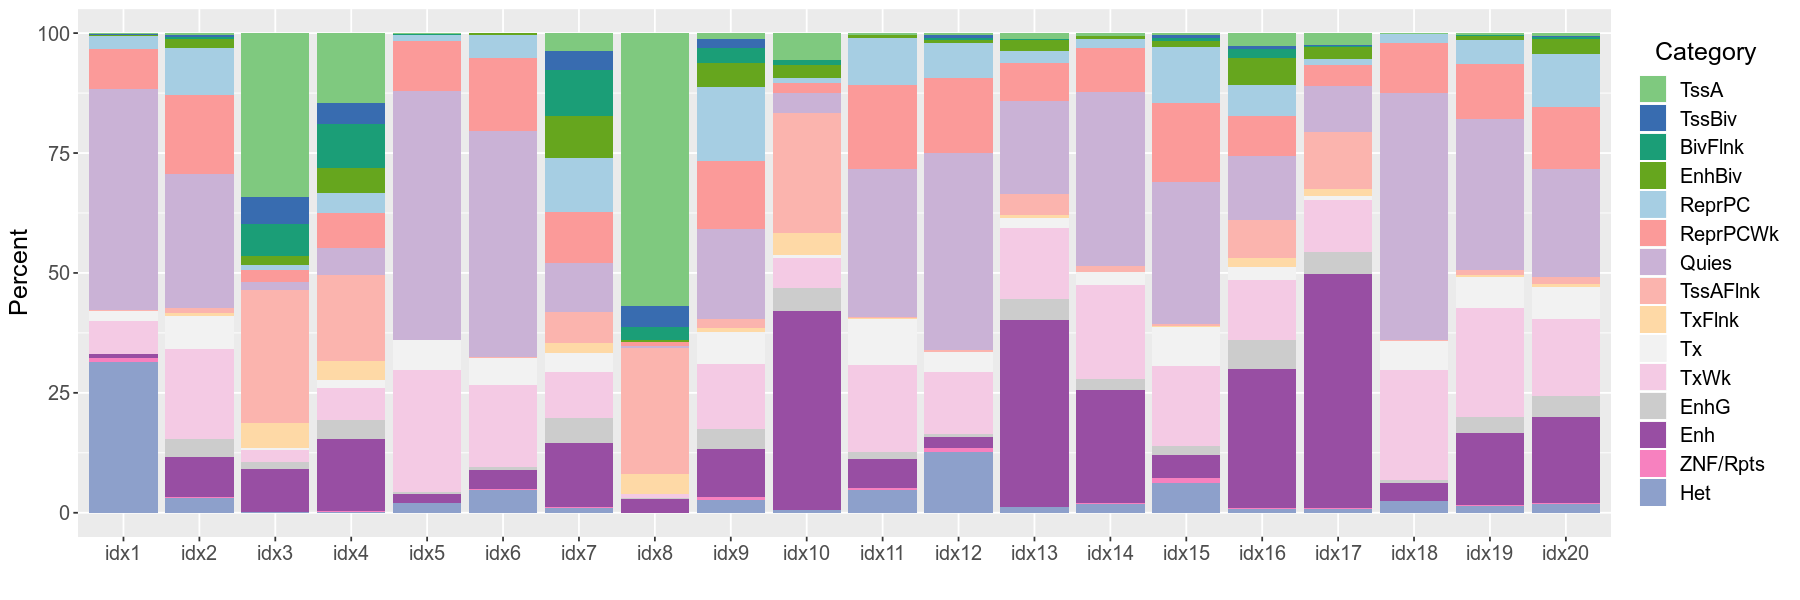

In [37]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(fib_annotated_df), aes(x=factor(Var2, levels=colnames(fib_annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_manual(values=col_vector[seq(1,length(col_vector),4)]) +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))

## ChromHMM - ESC

In [38]:
gzf = gzfile("/users/surag/kundajelab/scATAC-reprog/resources/ChromHMM/E003_15_coreMarks_hg38lift_mnemonics.bed.gz")
gr = read.table(gzf)
colnames(gr) = c("chr", "start", "end", "type")
annotations = makeGRangesFromDataFrame(gr)
annotations$type = gr$type

In [39]:
h1_annotated_df = get_annotated_df(annotations, bed_names, BED_DIR)

Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a tibble is deprecated."
Warning message:
"Setting row names on a

In [40]:
h1_annotated_df

,idx1,idx2,idx3,idx4,idx5,idx6,idx7,idx8,idx9,idx10,idx11,idx12,idx13,idx14,idx15,idx16,idx17,idx18,idx19,idx20
1_TssA,2.82114604,2.2487702,33.9980646,14.1757128,0.17192681,0.069572335,5.5636669,61.9642000,1.97723539,1.05088496,0.25022266,2.8304020,0.032032460,0.020800111,0.9578544,1.0937143,0.139385773,0.093724226,0.21216407,0.26157108
10_TssBiv,0.84550668,0.5110841,10.2889334,8.6351136,0.04502845,0.036832413,7.2225156,6.3918798,3.28268012,0.33738938,0.06361593,1.4287652,0.010677487,0.020800111,1.2172733,0.7130713,0.027877155,0.000000000,0.02357379,0.09361491
11_BivFlnk,0.66133691,0.7794033,8.3534942,8.1458967,0.02046748,0.036832413,7.3374546,4.1492353,3.35601971,0.55862832,0.05937487,0.9901885,0.000000000,0.003466685,1.1294700,0.8501028,0.032523347,0.007497938,0.04714757,0.10187505
12_EnhBiv,1.03804780,2.0890564,3.1658257,5.0050659,0.04912195,0.376509106,5.2374887,1.1384679,3.12426660,1.92477876,0.27991009,1.5689289,0.226896589,0.086667129,1.4447637,1.7484203,0.413511128,0.108720102,0.54219708,0.66356453
13_ReprPC,0.80783559,1.1371622,1.7177024,2.6545086,0.38478857,0.630243503,2.5628281,0.5555175,1.93323164,1.93584071,0.89486407,1.0444454,0.670012279,0.447202385,1.3370051,1.7103560,1.133670957,0.476119067,0.85454974,1.17018640
14_ReprPCWk,1.81239797,2.8620712,2.1911938,3.9745260,1.78885751,2.242684674,4.0756733,0.9190042,3.87233044,5.12721239,4.24954409,2.1612334,3.109817949,2.208278444,3.0212324,4.3748573,4.571853366,1.833245857,3.63036304,4.62017126
15_Quies,54.75702147,30.5628314,6.6392479,15.9183673,69.85140612,58.547165950,22.2515610,2.3935258,34.34053039,40.21570796,61.32999703,39.9918615,67.567134696,74.880399362,46.3362069,42.1803233,62.235747805,68.073779711,54.67939651,55.73666676
2_TssAFlnk,0.96270562,2.0890564,11.8580217,6.8519323,0.03684146,0.061387354,3.8861794,12.2762499,1.53719784,0.89601770,0.05513381,1.8537776,0.042709946,0.003466685,0.6545338,0.6318674,0.051108117,0.026242783,0.14144272,0.12114871
3_TxFlnk,0.07952786,0.1533252,0.4492984,0.2518454,0.00000000,0.008184981,0.1335777,0.3909197,0.06453884,0.11615044,0.00000000,0.1582493,0.005338743,0.006933370,0.0199553,0.0380643,0.004646192,0.003748969,0.02357379,0.00550676
4_Tx,1.48172952,3.1814988,0.8294740,2.0176581,6.35719841,3.454061797,3.0940325,0.1920307,3.80485801,3.96570796,7.17163578,1.9622915,4.369761358,4.156555502,4.3303001,4.1794605,4.506806672,5.312289120,5.46911834,5.93628679


In [41]:
# rename rows
rownames(h1_annotated_df) = lapply(strsplit(rownames(h1_annotated_df), "_"), "[[", 2)

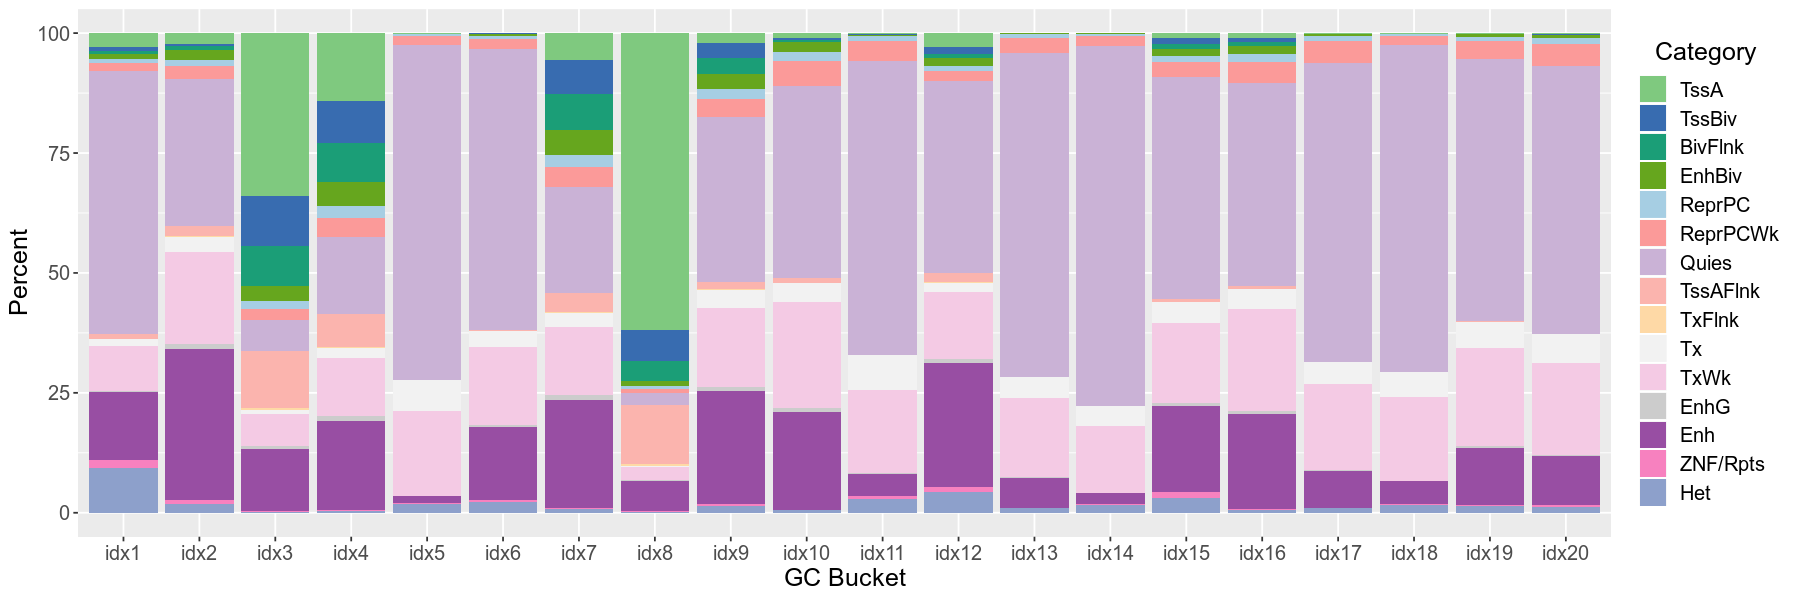

In [42]:
options(repr.plot.width = 15, repr.plot.height = 5)

ggplot(data=melt(h1_annotated_df), aes(x=factor(Var2, levels=colnames(h1_annotated_df)),
                                    y=value, fill=Var1)) +
scale_fill_manual(values=col_vector[seq(1,length(col_vector),4)]) +
geom_bar(stat="identity") +
ylab("Percent") +
xlab("GC Bucket") +
guides(fill = guide_legend(ncol=1, title="Category", pos="center")) +
theme(legend.title.align=0.4,
      text=element_text(size=15))